<a href="https://colab.research.google.com/github/Oliveirclau/Projeto-Novo---GIT/blob/main/20223_03_03_Aula04_LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atenção**:
Nessa atividade vamos utilizar o seaborn para criar gráficos, para isso precisamos garantir que a última versão esteja atualizada, por isso usamos o comando abaixo para instalá-la.

In [ ]:
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Também vamos precisar do scikit-learn para criar modelos de ML e subsets de treino e teste, para isso, precisamos do comando abaixo para instala-la também.

In [ ]:
!pip3 install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **LAB 02 - Aprendizado Supervisionado - Classificação**

## **Objetivos**

* Apresentar e utilizar o algoritmo K-Nearest Neighbours (K-NN);
* Apresentar e entender como funcionam as etapas de treino e teste do algoritmo;
* Apresentar as métricas de performance do modelo;

## **Como funciona o K-NN?**

O KNN (K-Nearest Neighbors) é um algoritmo de aprendizado de máquina supervisionado mais usado para problemas de classificação. A abordagem básica do algoritmo KNN é encontrar os K pontos de dados mais próximos ao ponto de dados de teste e, em seguida, prever a classe do ponto de dados de teste com base nas classes dos pontos de dados mais próximos.

O KNN segue os seguintes passos principais:

**1.** Receba um dado não classificado e meça distância do novo dado em relação a cada um dos outros dados que já estão classificados;

**2.** Selecione as K menores distâncias;

**3.** Verifique a(s) classe(s) dos dados que tiveram as K menores distâncias e 
contabilize a quantidade de vezes que cada classe que apareceu;

**4.** Classifique esse novo dado como pertencente à classe que mais apareceu

A distância pode ser medida de diferentes maneiras, como a distância Euclidiana, Manhattan, de Minkowski, entre outras. A escolha da medida de distância depende do problema em questão.

O algoritmo KNN é considerado um algoritmo simples e rápido de treinar, mas pode não funcionar bem em conjuntos de dados com muitas características, pois a distância entre os pontos pode se tornar muito grande em altas dimensões. Além disso, o valor de K pode afetar a precisão do modelo, portanto, é importante escolher um valor adequado para K.

## **Definição do Problema**

Desenvolver um sistema de machine learning capaz de classificar a espécie da flor íris com base nas suas características de Pétala e Sépala. Para isso vamos usar o dataset da ultima aula (https://archive.ics.uci.edu/ml/datasets/Iris).

Esse dataset contém 150 exemplares de flor íris, separadas em três espécies diferentes: **setosa**, **versicolor** e **virginica**, sendo que foram utilizadas 50 amostras de cada espécie. Os atributos de largura e comprimento da sépala e da pétala de cada flor foram medidos manualmente.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

### **1** - Do Ponto de vista de Machine Learning, qual a classificação desse problema?

Resposta: Classificação

### **2** - Carregue o Dataset e mostre as 10 primeiras linhas do dataset. Em seguida mostre as 10 ultimas linhas do dataset. Não esqueça de colocar o cabeçalho nos dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=header)
df.head(10)
print()
df.tail(10)



,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### **3** - Verifique se as informações do Dataset estão condizentes com a definição do problema **"Esse dataset contém 150 exemplares de flor íris, separadas em três espécies diferentes: setosa, versicolor e virginica, sendo que foram utilizadas 50 amostras de cada espécie."**

In [ ]:
print(df.info())
print()
print(df.groupby('species').size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### **4** - Agora precisamos analisar os dados e tentar entender como eles se relacionam. Essa etapa faz parte da Analise Exploratória que vimos na última aula. Levante hipóteses sobre como as caracteristcas das Pétalas e das Sépalas influenciam na classificação da Iris e crie gráficos utilizando o **seaborn** para validar a sua hipótese.

OBS: Lembre-se que temos 4 atributos numéricos possíveis, com um resultado do tipo objeto (classificação da flor). Verifique a documentação do seaborn em (https://seaborn.pydata.org/examples/index.html) para determinar qual gráfico é mais adequado para validar a sua hipótese.

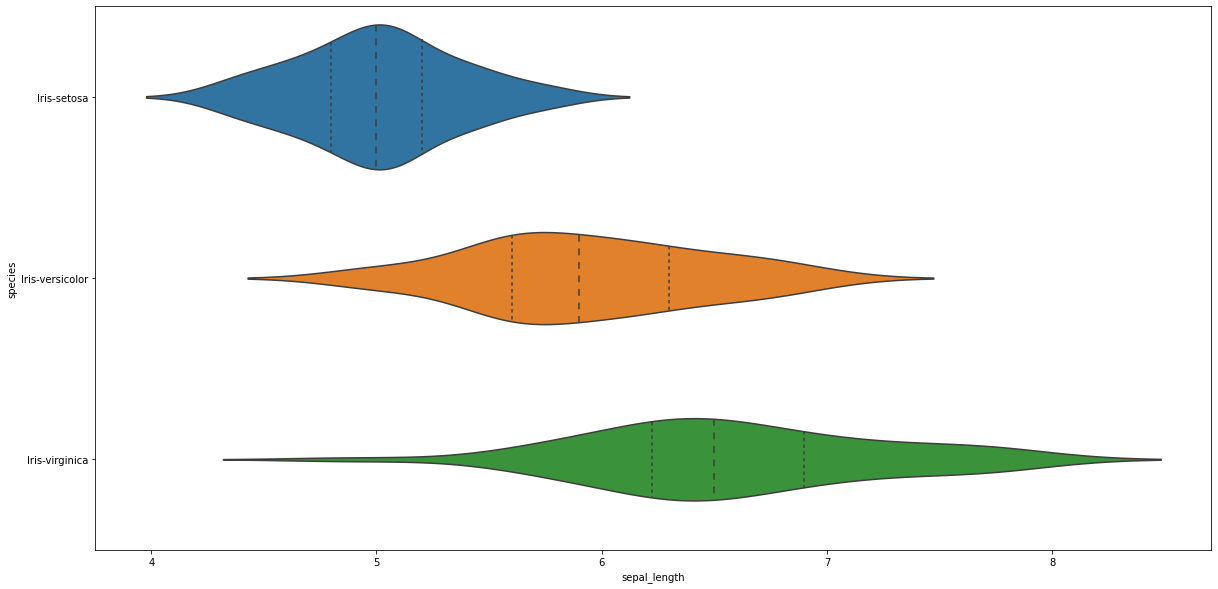

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
g = sns.violinplot(y='species', x='sepal_length', data=df, inner='quartile')
plt.show()

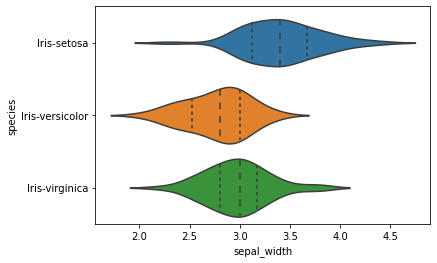

In [ ]:
g = sns.violinplot(y='species', x='sepal_width', data=df, inner='quartile')
plt.show()


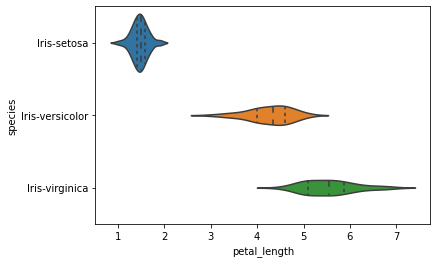

In [ ]:
g = sns.violinplot(y='species', x='petal_length', data=df, inner='quartile')
plt.show()


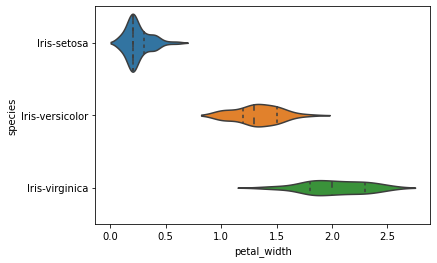

In [ ]:
g = sns.violinplot(y='species', x='petal_width', data=df, inner='quartile')
plt.show()

Resposta: A melhor correlação que pode determinar a espécie da flor é...

### **5** - Agora que você identificou uma correlação entre os tamanhos de pétalas e sépalas, e como elas podem determinar a classificação da flor, vamos nos preparar para implementar o modelo. Primeiro temos que criar um novo dataset, somente com os dados que vamos utilizar, aqueles que identificamos a correlação.

Obs: Lembre-se que estamos começando o projeto do nosso modelo, então precisamos criar duas "tabelas", uma com os atributos (entradas) e outra com a classificação (classe).

In [1]:
entradas = df[['petal_length', 'petal_width']]
classes = df['species']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

NameError: ignored

### **6 -** Com os dois suconjuntos criados precisamos separa-los em Treino e Teste! 
Como assim você deve estar se perguntando. É simples: Imagine que o modelo é uma criança a qual você está tentando ensinar o que é um cachorro. Um jeito de fazer isso é mostrar vários cachorros para ela, dizendo "Olá só, isso é um cachorro. Ele tem quatro patas, tem rabo e faz "au-au"". Depois de mostrar muitos cachorros para a criança, você mostra outros animais e pergunta: "Isso é um cachorro?". A criança vai lembrar das caracteristicas que aprendeu e vai responder sim ou não. 

Para algoritmos de ML é a mesma coisa, nós vamos pegar um dataset de Treino e vamos passar no algoritmo, ja dando as respostas. Ele vai entender a correlação dos dados com a classificação. No nosso caso, ele vai relacionar as caracteristicas dos atributos com o tipo de flor. Depois vamos passar no algoritmo os dados de Teste, sem as respostas, e ele vai precisar lembrar do treino e classficar esses novos dados.

Normalmente usamos 80% do Dataset para Treino e 20% para Teste, e para isso, vamos usar o **Scikit-Learn** com a função **train_test_split()**. Ele vai pegar o nosso dataset e fazer essa separação de forma aleatória.

In [ ]:
from sklearn.model_selection import train_test_split
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)
print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")
entradas_treino.head()
print()
classes_treino.head()

Formato das tabelas de dados de treino (120, 2) e teste (30, 2)



112     Iris-virginica
72     Iris-versicolor
86     Iris-versicolor
131     Iris-virginica
57     Iris-versicolor
Name: species, dtype: object

### **7 -** Agora vamos treinar o nosso modelo baseado no Algoritmo K-NN!

Treinar um modelo no python é simples se usar o Scikit-Learn e treinar um modelo no Scikit-Learn é mais simples ainda: basta criar o classificador, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do scikit-learn:

* O método fit(X,Y) recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros;
* O método predict(X) recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes;
* Não esqueça de importar as bibliotécas com "from sklearn.neighbors import KNeighborsClassifier";

Faça o treinamento do modelo usando um K = 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
modelo = KNeighborsClassifier(n_neighbors=k)
modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=3)

## **8 -** Agora que temos o modelo treinado, vamos testar!

Para testar o modelo, vamos usar o método predict() com os dados de teste que separamos. Verifique se as resposta fazem sentido e determine a acurácia do modelo, ou seja, a quatidade de acertos que ele teve. Você vai precisar importar essa bibliotéca também com "from sklearn.metrics import accuracy_score"

In [ ]:
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))
print()

from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print(acertos)

Predição: ['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor']

1.0


### **9 -** Fizemos o treinamento do algortimo com um K igual a 3 e obtivemos uma determinada acurácia, mas se mudarmos esse valor de K, será que teremos resultados melhors?

Faça um programa que treina o algoritmo com valores de K iniciando em 1 e indo até 26. Verifique a acurácia para cada K, armazenando esses valores em uma lista. Por fim, plote um gráfico com os valores de acurácia obtidos e determine se se houve mudanças de perfomance com K maiores.

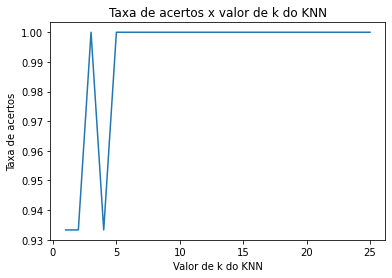

In [ ]:
k_range = list(range(1,26))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))
  
  
plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()

### **10 -** Por fim, vamos exportar o nosso modelo para ultizar em nossas aplicações. Para fazer isso, usaremos o Pickle, com o método dump()

In [2]:
import pickle

with open('knn_model.pkl', 'wb') as file:
  pickle.dump(modelo,file)

NameError: ignored